<a href="https://colab.research.google.com/github/KyleEtera/MAT422/blob/main/3_3_Unconstrained_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3.3 Unconstrained Optimization**  - A minimizer of a function is the lowest point on the function. We can find this either over the entire function, or over a small subsection of the function, by taking an ẋ that equals the same x value minus some small difference and finding where it is less than every value in the function, or in the subsection for local.

The descent direction similarly is found by adding a small difference vector to the x value that is less than the x value by itself.

In [8]:
from scipy import optimize
import numpy as np

def f(x):
  return -np.exp(-(x - 0.7)**2)
min_vals = optimize.minimize_scalar(f)
print(min_vals.x)

def f(x):   # The rosenbrock function
  return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2
  optimize.minimize(f, [2, -1], method="CG")

def jacobian(x):
  return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))
optimize.minimize(f, [2, 1], method="CG", jac=jacobian)

0.6999999997839409


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 2.957865890641887e-14
       x: [ 1.000e+00  1.000e+00]
     nit: 8
     jac: [ 7.183e-07 -2.990e-07]
    nfev: 16
    njev: 16

In [9]:
cur_x = 3 # Starting value
rate = 0.01 # Learning rate
precision = 0.000001 # Stop Value
previous_step_size = 1
max_iters = 10000
iters = 0
df = lambda x: 2*(x+5) #Gradient of our function

while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x
    cur_x = cur_x - rate * df(prev_x) #Gradient Descent
    previous_step_size = abs(cur_x - prev_x) #dx
    iters = iters+1 #count

print("The local minimum occurs at", cur_x)

The local minimum occurs at -4.9999518490318176


**3.3.2 Convexity and Global Minimizers** -

A set $D \subseteq\mathbb{ R}^d$ is convex if for all $\textbf{x},\textbf{y}\in D$ and
all $\alpha \in [0,1]$
$$(1-\alpha)\textbf{x}+\alpha\textbf{y}\in D.$$

A function  $f : \mathbb{R}^d\to\mathbb{R}$  is convex if, for
all $\textbf{x},\textbf{y} \in \mathbb{R}^d$ and all $\alpha \in [0,1]$
$$f((1−\alpha)\textbf{x}+\alpha\textbf{y}) \leq (1−\alpha)f(\textbf{x}) +\alpha f(\textbf{y}).$$

   2
1 x - 2 x
Solution: x=1.000000


<ipython-input-17-222bf389f20f>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Solution: x=%f" % min_vals.x)


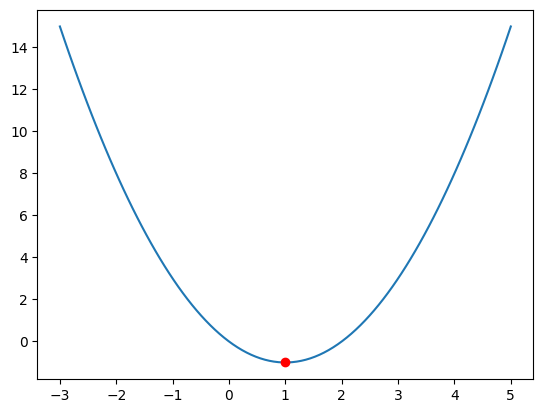

In [17]:
objective = np.poly1d([1.0, -2.0, 0.0])
print(objective)
x0 = 3.0
min_vals = optimize.minimize(objective,x0)
print("Solution: x=%f" % min_vals.x)
import matplotlib.pylab as plt
x = np.linspace(-3,5,100)
plt.plot(x,objective(x))
plt.plot(min_vals.x,objective(min_vals.x),'ro')
plt.show()

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 2
         Function evaluations: 6
         Gradient evaluations: 3
Solution: x=1.000000


<ipython-input-11-978e82de3593>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Solution: x=%f" % results.x)


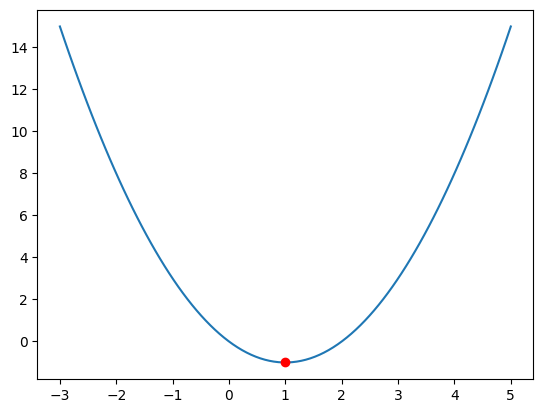

In [11]:
def objective(x,coeffs):
  return coeffs[0]*x**2 + coeffs[1]*x + coeffs[2]
x0 = 3.0
mycoeffs = [1.0,-2.0,0.0]
myoptions={'disp':True}
results = optimize.minimize(objective,x0,args=mycoeffs,
options = myoptions)
print("Solution: x=%f" % results.x)
x = np.linspace(-3,5,100)
plt.plot(x,objective(x,mycoeffs))
plt.plot(results.x,objective(results.x,mycoeffs),'ro')
plt.show()

A value xₒ is a global minimizer if the gradient of a convex, continuously differentiable function at xₒ is equal to 0. Any local minizer of any convex function function is also a global minizer.

In [18]:
optimize.brute(f, ((-1, 2), (-1, 2)))

array([1.00001462, 1.00001547])

**3.3.3 Gradient Descent**

Lemma 3.3.22 (Steepest Descent):

Let $f : \mathbb{R}^d\to\mathbb{R}$ be continuously differentiable at $\textbf{x}_0$. For any unit vector $\textbf{v}\in\mathbb{R}^d$,
$$\frac{\partial f(\textbf{x}_0)}{\partial \textbf{v}}\geq\frac{\partial f(\textbf{x}_0)}{\partial\textbf{v}^*}$$



Theorem 3.3.23

Suppose that  $f : \mathbb{R}^d\to\mathbb{R}$ is twice continuously differentiable. The step size is chosen to minimize
$$\alpha_k = \arg \min_{\alpha >0}f(\textbf{x}^k −\alpha\nabla f(\textbf{x}^k
))$$
Then steepest descent started from any $\textbf{x}^0$ produces a sequence $\textbf{x}^k$, $k = 1,2,\cdots$ such that if $\nabla f(\textbf{x}^k)\neq 0$, then
$$f(\textbf{x}^{k+1}) \leq f(\textbf{x}^k), \forall k \geq 1$$

In [16]:
optimize.minimize(f, [2, -1], method="CG")

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 1.6503729082243953e-11
       x: [ 1.000e+00  1.000e+00]
     nit: 13
     jac: [-6.153e-06  2.538e-07]
    nfev: 81
    njev: 27

Source: [madonnaojorin](https://github.com/madonnaojorin/MAT494/blob/main/3.3_Unconstrained_Optimization.ipynb)